## 5g. Divergence Theorem 
 

**Divergence Theorem.** Let *E* be a simple solid region and *S* is the boundary surface of *E* with positive orientation. Let $\vec{F}$ be a vector field whose components have continuous first order partial derivatives. Then,

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; $\iint\limits_{S}{{\vec F\centerdot d\vec S}} = \iiint\limits_{E}{{{\mathop{ \rm \nabla \cdot}\nolimits} \vec F\,dV}}$

(Watch YouTube: Dr. Trefor Bazett, Divergence Theorem) 


In [1]:
import sympy as sp
from sympy import sin, cos, exp, pi, symbols
from sympy.vector import CoordSys3D, ParametricRegion, Del, gradient, divergence, vector_integrate
                                     
from sympy.abc import r, x, y, z, t, theta, phi
C = CoordSys3D('C')

========================================================================================================================

**Example 1. Verifying Divergence Theorem** *[SymPy 1.12 doc]*

In [2]:
# LEFT SIDE: The surface integral across the sphere

field = C.x**3*C.i + C.y**3*C.j + C.z**3*C.k

sphere = ParametricRegion((4*sin(phi)*cos(theta),4*sin(phi)*sin(theta), 4*cos(phi)),
                        (phi, 0, pi), (theta, 0, 2*pi))
vector_integrate(field, sphere)

12288*pi/5

In [3]:
# RIGHT SIDE: The volume intgral across the sphere

solidsphere = ParametricRegion((r*sin(phi)*cos(theta),r*sin(phi)*sin(theta), r*cos(phi)),
    (r, 0, 4),(phi, 0, pi), (theta, 0, 2*pi))
vector_integrate(divergence(field), solidsphere)

12288*pi/5

====================================================================================================================

**Problem 1.**  Vector field &nbsp; $ \vec{F}(x, y, z) = 4xz\mathbf{\hat{i}} - y^2\mathbf{\hat{i}} + yz\mathbf{\hat{k}}$. Evaluate $\iint_S \vec{F} \cdot \vec{n }$ *dS* &nbsp; where $S$ is the surface of the cube bounded by x=0, x=1, y=0, y=1, z=0, z=1. [Sch/s118/17]. (This integral is solved directly in VecAnal_5e Problem 6)

**Solution.** The surface is the unit cube in the first quadrant and we want to calculate the flux outward from the cube. Because of many faces this integral is easier to solve using *Divergence Theorem*  &nbsp; $\iint\limits_{S}{{\vec F\centerdot d\vec S}} = \iiint\limits_{E}{{{\mathop{ \rm \nabla \cdot}\nolimits} \vec F\,dV}}$. 


 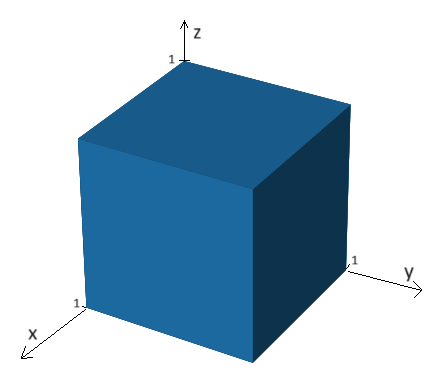

In [4]:
F = 4*C.x*C.z*C.i - C.y**2*C.j + C.y*C.z*C.k                          # Vector field (Obs. C.x, C.y, C.z !)
divF = Del().dot(F).doit()                                            # Or: divergence(F)
E = ParametricRegion((x, y, z),  (x, 0, 1), (y, 0, 1), (z, 0, 1))     # 3D region
vector_integrate(divF, E)                                             # Volume integral

3/2

=====================================================================================================================

**Problem 2.** Verify the divergence theorem &nbsp; &nbsp; $\iint\limits_{S}{{\vec F\centerdot d\vec S}} = \iiint\limits_{E}{{{\mathop{ \rm \nabla \cdot}\nolimits} \vec F\,dV}}$ &nbsp; &nbsp;for &nbsp; &nbsp;$ \vec{F}(x, y, z) = 4x\mathbf{\hat{i}} - 2y^2\mathbf{\hat{i}} + z^2\mathbf{\hat{k}}$ &nbsp; &nbsp;taken over the region bounded by $x^2 + y^2 = 4$, $z = 0$ and $z = 3.$


**Solution.** We have a cylinder with radius 2 and hight 3. In the solution we use SymPy's *ParametricRegion* method.

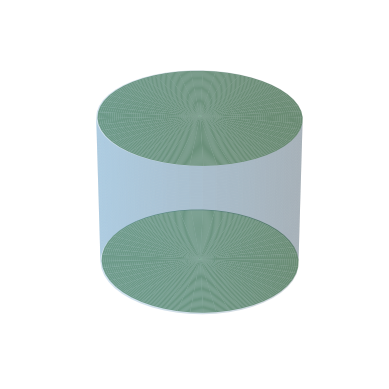

**A.** &nbsp; &nbsp; $\iint\limits_{S}{{\vec F\centerdot d\vec S}}$

In [5]:
from sympy import sin, cos, exp, pi, symbols
from sympy.vector import CoordSys3D, ParametricRegion, ImplicitRegion, vector_integrate, ParametricIntegral
from sympy.abc import r, x, y, z, theta, phi
C = CoordSys3D('C')

In [6]:
from sympy.abc import r, x, y, z, theta, phi
C = CoordSys3D('C')

F = 4*C.x*C.i - 2*C.y**2*C.j + C.z**2*C.k                             # Vector field (Obs. C.x, C.y, C.z !)
                                           
# Cylinder surface definition in cylindrical coordinates: (Tuple of length 3 to define base scalars x,y,z
# in terms of two parameters),  (the lower and upper bounds of these two parameters).
cyl = ParametricRegion((2*cos(theta), 2*sin(theta), z),
                        (theta, 0, 2*pi), (z, 0, 3))                  # The radius of the cylinder is 2
I1 = vector_integrate(F, cyl)                                         # Double integral over the cylinder surface

topcap =  ParametricRegion((r*cos(theta), r*sin(theta), 3),
                        (r, 0, 2), (theta, 0, 2*pi)) 
I2 = vector_integrate(F, topcap) 

bottom =  ParametricRegion((r*cos(theta), r*sin(theta), 0),
                        (r, 0, 2), (theta, 0, 2*pi)) 
I3 = vector_integrate(F, bottom) 

I = I1+I2+I3
I

84*pi

==================

**B**. &nbsp; &nbsp; $\iiint\limits_{E}{{{\mathop{ \rm \nabla \cdot}\nolimits} \vec F\,dV}}$

In [7]:
F = 4*C.x*C.i - 2*C.y**2*C.j + C.z**2*C.k                             # Vector field (Obs. C.x, C.y, C.z !)
divF = Del().dot(F).doit()                                            # Or: divergence(F
# Solid cylinder definition: Tuple of length 3 to define base scalars x,y,z in terms of three parameters and
# then the lower and upper bounds of these three parameters.
solidcyl = ParametricRegion((r*cos(theta), r*sin(theta), z),          # Solid cylinder 
           (r, 0, 2), (theta, 0, 2*pi), (z, 0, 3) )                   
vector_integrate(divF, solidcyl)                                      # Triple integral


84*pi